In [1]:
import sympy as sym
import scipy as sci
from scipy.signal import cont2discrete, lti, dlti, dstep
%matplotlib inline
sym.init_printing()
from sympy import oo

import matplotlib.pyplot as plt
from sympy.plotting.plot import MatplotlibBackend




s = sym.symbols('s', complex=True)
z = sym.symbols('z', complex=True)
T = sym.symbols('T', real=True,positive=True)
wc = sym.symbols('omega_c', real=True,positive=True)


# Discretización de un filtro

A partir de un filtro diseñado en tiempo CONTINUO se pretende encontrar un fitro en tiempo discreto que se implemente en un sistema microcontrolado.

## Aproximación de la derivada

En tiempo discreto no existe la derivada de una señal, pero puede encontrarse una aproximación a partir de observaciones hacia el pasado, es decir, valores anteriores de la señal. Una aproximación a la derivada es:

$$\frac{dx}{dt}\bigg \rvert_{t=kT} \approx \frac{x[k]-x[k-1]}{T}$$

![figuras/deivadaDiscreta1.png](figuras/deivadaDiscreta1.png)

Llevando al dominio de las frecuencias se obtiene:

\begin{align}
\frac{dx}{dt}\bigg \rvert_{t=kT} &\approx \frac{x[k]-x[k-1]}{T}\\
sX(s) &\approx \frac{X(z) - z^{-1}X(z)}{T} \\
sX(s) &\approx \frac{1 - z^{-1}}{T} X(z)
\end{align}

Por lo cuál podría usarse la equivalencia $s \approx (1-z^{-1})/T$ para llevar la función de transferencia a tiempo discreto.

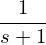

In [8]:
H1c = 1/(s+1)
H1c

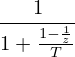

In [9]:
H1d = H1c.subs(s,(1-z**(-1))/T)
H1d

----------
Retomando un filtro diseñado

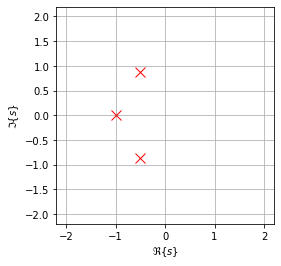

In [13]:
def pole_zero_plot(poles, zeros, ax=None):
    mR = -2 #  valor inicial para minimo real
    MR = 2  #  valor inicial para maximo real
    mI = -2 #  valor inicial para minimo imaginario
    MI = 2  #  valor inicial para maximo imaginario
    for pole in poles:
        plt.plot(complex(pole).real, complex(pole).imag, 'rx', markersize=10)
        if complex(pole).real < mR:
            mR = complex(pole).real
        if complex(pole).real > MR:
            MR = complex(pole).real
        if complex(pole).imag < mI:
            mI = complex(pole).imag
        if complex(pole).imag > MI:
            MI = complex(pole).imag
            
    for zero in zeros:
        plt.plot(complex(zero).real, complex(zero).imag, 'bo', markersize=10)
        if complex(zero).real < mR:
            mR = complex(zero).real
        if complex(zero).real > MR:
            MR = complex(zero).real
        if complex(zero).imag < mI:
            mI = complex(zero).imag
        if complex(zero).imag > MI:
            MI = complex(zero).imag

            
    if ax is None:
        ax = plt.gca()
    ax.set_aspect(1)
    
    plt.axis([mR*1.1, MR*1.1, mI*1.1, MI*1.1])
    plt.xlabel(r'$\Re \{ s \}$')
    plt.ylabel(r'$\Im \{ s \}$')
    plt.grid()



H_norm = 1/((s+1)*(s**2+s+1))

plt.rcParams['figure.figsize'] = 4,4
pole_zero_plot(sym.roots(sym.denom(H_norm), s),
               sym.roots(sym.numer(H_norm), s))

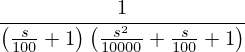

In [10]:
H = H_norm.subs({s:s/wc}).subs({wc:100})
H

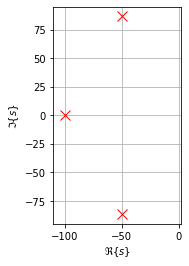

In [14]:

plt.rcParams['figure.figsize'] = 4,4
pole_zero_plot(sym.roots(sym.denom(H), s),
               sym.roots(sym.numer(H), s))

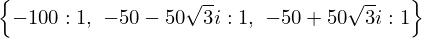

In [16]:
sym.roots(sym.denom(H))

In [19]:
import numpy as np
np.sqrt(50**2 + (50*np.sqrt(3))**2)

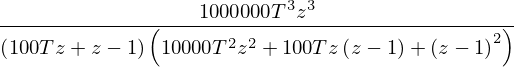

In [20]:
H_d = H.subs(s,(1-z**(-1))/T)
H_d.together().simplify()

¿Qué valor es apropiado para $T$?

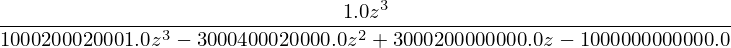

In [6]:
Ts = 0.000001
H_d = H_d.subs({T:Ts})
H_d.together().simplify()

Esta función de transferencia tiene asociada una ecuación en diferencias.
$$\frac{Y(z)}{X(z)}=\frac{z^{3}}{1000200020001z^{3}-3000400020000z^{2}+3000200000000z-1000000000000}$$

$$Y(z)(1000200020001z^{3}-3000400020000z^{2}+3000200000000z-1000000000000)=X(z)z^{3} $$

$$1000200020001 y[k+3] - 3000400020000 y[k+2] + 3000200000000 y[k+1] + 1000000000000 y[k] = x[k+3]$$

Si se considera que el instante $k$ es el instante presente, se necesitaría conocer valores futuros de $x$ y de $y$ para calcular el valor present de $y$.

La ecuación debe conservar relaciones temporales y puede considerarse que el instante presente es $k+3$. Así, el instante $k+2$ corresponde a un instante anterior al presente.  Teniendo en consideración lo anterior, puede escribirse la ecuación como:

$$1000200020001 y[k] - 3000400020000 y[k-1] + 3000200000000 y[k-2] + 1000000000000 y[k-3] = x[k]$$

Y se despeja $y[k]$

$$y[k] = (x[k]  + 3000400020000 y[k-1] - 3000200000000 y[k-2] - 1000000000000 y[k-3])/1000200020001$$

Esta última ecuación en diferencias se puede programar en un sistema microcontrolado, introduciéndola en un ciclo y completando el periodo de muestreo.

Existen diversas equivalencias para discretizar sistemas.

- ¿Cuál usaría para discretizar el filtro diseñado para la voz soprano?}

- Encuentre una versión discreta del filtro diseñado para la voz soprano.

- Encuentre los espectros correspondientes a los filtros en tiempo continuo y tiempo discreto.

- Use el filtro para transformar un sonido extraido de una ópera.

In [7]:
# Averigüe como se usa cont2discrete()
cont2discrete()

TypeError: cont2discrete() missing 2 required positional arguments: 'system' and 'dt'